In [110]:
%pip install matplotlib numpy scipy spectral rich

Note: you may need to restart the kernel to use updated packages.


In [111]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import sklearn.cluster
import spectral as spy
from rich import print
import os

# Purpose:

I'll aim to distinguish between western honey bees (*Apis mellifera*) and the *Varroa destructor* parasitic mite (Varroa mite) using hyperspectral imaging. Hyperspectral images capture a broad spectrum of radiation from each pixel, enabling this differentiation.

The dataset is available [here](https://www.kaggle.com/datasets/imonbilk/bee-dataset-but-hs).

In [112]:
experiment_dir = "MitesOnBess_Sparse"
image_id = "055"

path = os.path.join("/", os.getcwd(), "BeeDataset_BUT_HS", experiment_dir, "capture", f"{image_id}.hdr")
path

'/home/kapi/Programming/Hyperspectral/BeeDataset_BUT_HS/MitesOnBess_Sparse/capture/055.hdr'

In [113]:
img = spy.open_image(path)
hyperspectral_img = img.load()
mean_image = np.mean(hyperspectral_img, axis=2)
rgb_image = spy.get_rgb(hyperspectral_img)

print(f"Hyperspectral image shape: {img.shape}")
print(f"Mean image shape: {mean_image.shape}")
print(f"RGB image shape: {rgb_image.shape}")

Hyperspectral image shape: (512, 512, 204)

Mean image shape: (512, 512)

RGB image shape: (512, 512, 3)

## Approach 1.

### K-means Clustering

We will begin with one of the simplest unsupervised learning algorithms: **k-means clustering**. The goal is to determine which **cluster** each pixel belongs to, enabling us to distinguish between bees and parasites. 

In [114]:
# from (row, col, band) to (row x col, band)
pixels = hyperspectral_img.reshape(-1, hyperspectral_img.shape[-1])
# normalize the pixels
pixels = pixels / np.max(pixels, axis=1, keepdims=True)

print(f"Pixels shape: {pixels.shape}")

n_clusters = 3
kmeans = sklearn.cluster.KMeans(n_clusters)
kmeans.fit(pixels)

Pixels shape: (262144, 204)

KMeans(n_clusters=3)

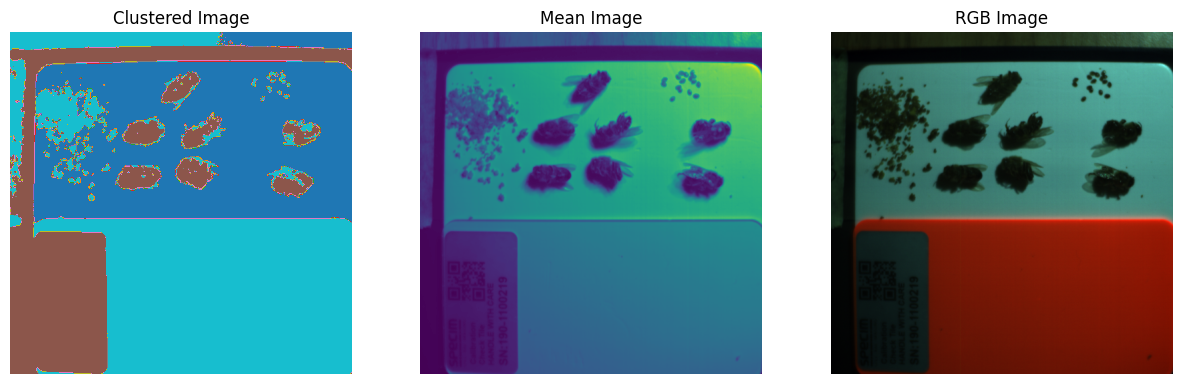

In [115]:
labeled_image = kmeans.labels_.reshape(hyperspectral_img.shape[:2])

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(labeled_image, cmap="tab10")
ax[0].set_title("Clustered Image")
ax[0].axis("off")
ax[1].imshow(mean_image)
ax[1].set_title("Mean Image")
ax[1].axis("off")
ax[2].imshow(rgb_image)
ax[2].set_title("RGB Image")
ax[2].axis("off")
plt.show()

The algorithm performed quite well overall. However, the shadows in the image posed a significant challenge. These likely disrupted the lighting and altered the radiation spectrum, leading to noticeable distortions around the edges of each segment. Potential solutions include splitting the image into smaller batches for processing or removing background noise to minimise interference.

It's important to note that this process is inherently random and may yield different results on each run. A cleaner, less noisy image would likely produce more consistent outcomes.

Additionally, this approach relies solely on spectral analysis. A more robust method would combine both spatial and spectral analysis to improve segmentation accuracy.